In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving GME.csv to GME.csv


In [4]:
df = pd.read_csv('/content/GME.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-25,4.9900,5.0000,4.8350,4.9025,4.199955,10313600
1,2017-10-26,4.8875,4.9350,4.8175,4.8775,4.178537,8568400
2,2017-10-27,4.8500,4.8625,4.7300,4.8350,4.142128,8920800
3,2017-10-30,4.8575,4.8675,4.6500,4.6925,4.020049,9008000
4,2017-10-31,4.7225,4.7600,4.6475,4.6725,4.002914,8775600
5,2017-11-01,4.6675,4.7375,4.6325,4.6500,3.983639,9954800


In [16]:
df

,Close,Prediction
0,4.902500,4.6125
1,4.877500,4.5725
2,4.835000,4.6275
3,4.692500,4.5625
4,4.672500,4.5425
...,...,...
1253,26.670000,NaN
1254,24.540001,NaN
1255,24.410000,NaN
1256,25.299999,NaN


In [5]:
df.shape

(1258, 7)

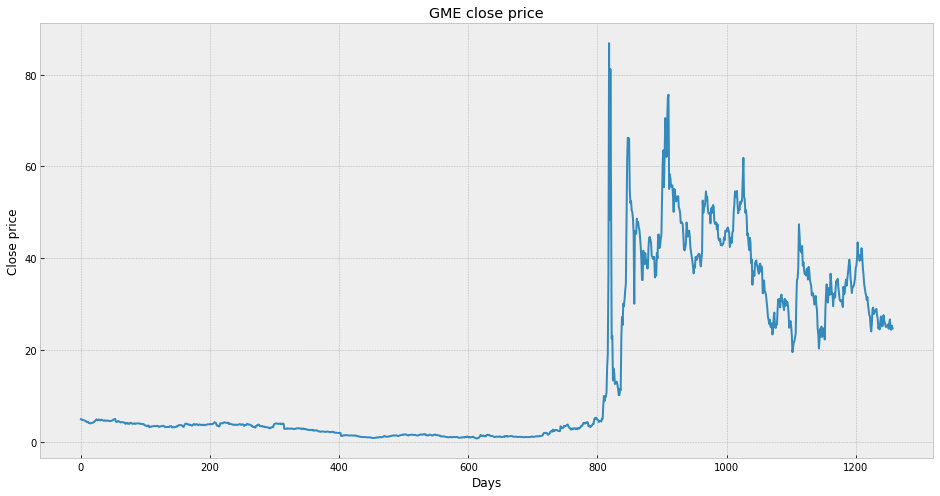

In [6]:
#visualize close price
plt.figure(figsize=(16,8))
plt.title('GME close price')
plt.xlabel("Days")
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.show()

In [7]:
# predict price in future
future_days = 40
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)
df=df[['Close','Prediction']]
df

,Close,Prediction
0,4.902500,4.6125
1,4.877500,4.5725
2,4.835000,4.6275
3,4.692500,4.5625
4,4.672500,4.5425
...,...,...
1253,26.670000,NaN
1254,24.540001,NaN
1255,24.410000,NaN
1256,25.299999,NaN


In [8]:
#Feature dataset , convert into np array
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 4.9025  ]
 [ 4.8775  ]
 [ 4.835   ]
 ...
 [32.5     ]
 [31.959999]
 [30.940001]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [9]:
# Target dataset ,get all target values except last 50 rows of data
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 4.6125    4.5725    4.6275   ... 24.41     25.299999 24.709999]


In [10]:
# split data into 90 percent training and 10 percent test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [11]:
#Create Models
#Decision Tree
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression
lr = LinearRegression().fit(x_train, y_train)

In [12]:
# get last 'x' rows of feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(len(x_future))

40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
# Show Decision tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show Linear Regression prediction

lr_prediction = lr.predict(x_future)
print(len(lr_prediction))

[31.549999 29.84     28.639999 24.700001 27.360001 25.139999 24.040001
 25.83     28.92     29.24     38.360001 28.129999 25.27     28.639999
 47.665001 27.540001 26.860001 24.700001 25.040001 34.615002 26.129999
 27.309999 25.044999 34.67875  25.379999 25.584999 26.389999 25.99
 44.650002 25.       25.27     25.360001 25.559999 25.044999 25.959999
 26.67     24.540001 24.41     25.299999 24.709999]

40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


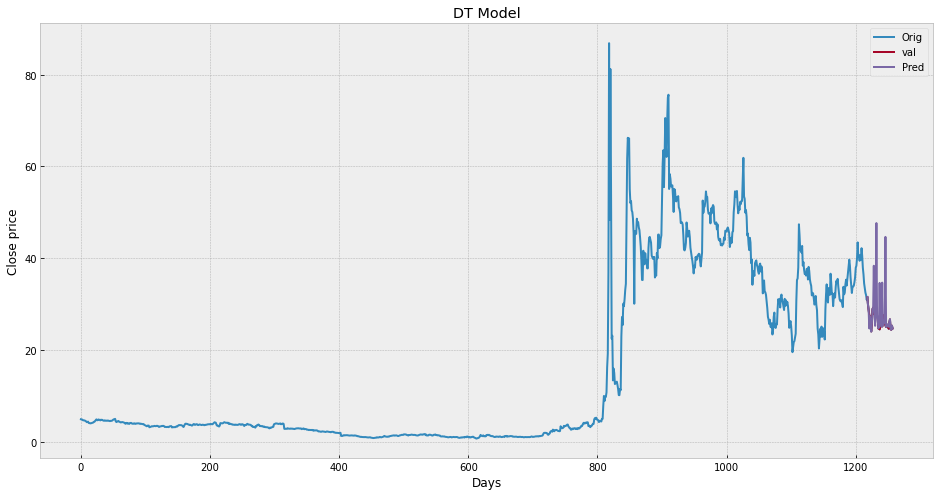

In [14]:
# visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('DT Model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig' , 'val' , 'Pred'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


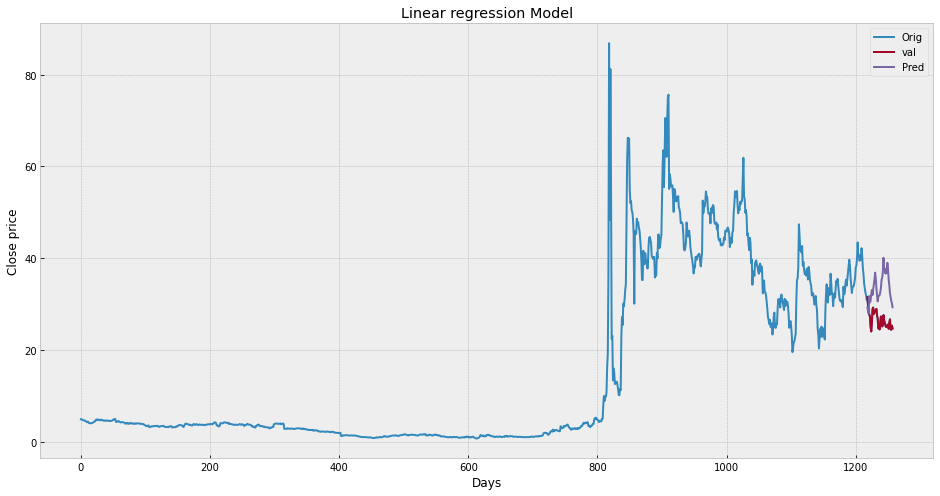

In [15]:
# visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Linear regression Model')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig' , 'val' , 'Pred'])